# Project 4: Regression Analysis


## Part2

### b) Random Forest Regression Model

In [1]:
#i
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate

df = pd.read_csv('network_backup_dataset.csv', sep=',')
data = df.replace({'Day of Week': {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4,
                                   'Saturday': 5, 'Sunday': 6},
                  'Work-Flow-ID': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'File Name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22, 'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26, 
                                'File_27': 27,'File_28': 28, 'File_29': 29, }})

X=data[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 
        'Work-Flow-ID','File Name']]
y=data['Size of Backup (GB)']



In [2]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
def random_forest(n_estimator=20,max_feature=5, max_depth=12, bootstrap=True):
    
    kf = KFold(n_splits=10)

    oob = []
    rmse_train = []
    rmse_test = []
    rf = RandomForestRegressor(n_estimators=n_estimator, max_depth=max_depth, bootstrap=bootstrap, max_features=max_feature, oob_score=True)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        rf.fit(X_train,y_train)
        oob.append(rf.oob_score_)
        y_predict_train = rf.predict(X_train)
        y_predict = rf.predict(X_test)
        rmse_train.append(mean_squared_error(y_train, y_predict_train))
        rmse_test.append(mean_squared_error(y_test, y_predict))


    oob = np.mean(oob)
    rmse_train = np.mean(rmse_train)**0.5
    rmse_test = np.mean(rmse_test)**0.5
    return(oob,rmse_train,rmse_test)
oob, rmse_train, rmse_test = random_forest(n_estimator=200,max_feature=5,max_depth=4)

    

In [3]:
print(oob)
print(rmse_train)
print(rmse_test)

0.661268519032
0.0605018500523
0.0606209313223


/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

Test RMSE with cross validation: 0.0605729
Train RMSE with cross validation: 0.0604796

Fitted values vs. true values 


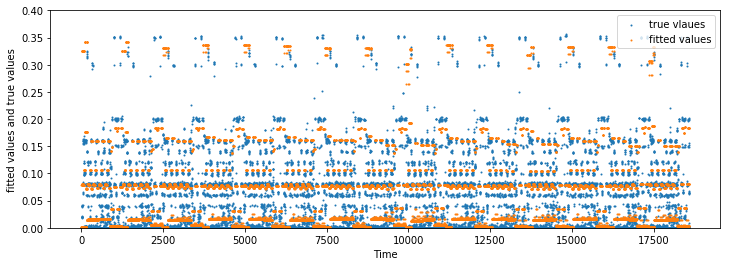

 residuals vs. ﬁtted values 


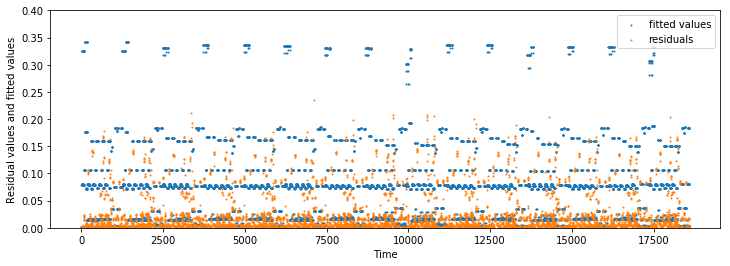

In [4]:
def print_RMSEs_plot(features,targets):
    rf = RandomForestRegressor(n_estimators=20, max_depth=4, bootstrap=True, max_features=5, oob_score=True)
    predicted = cross_val_predict(rf, features, targets, cv=10)
    #print ("Test RMSE with cross validation:", np.sqrt(metrics.mean_squared_error(targets, predicted)))
    cv_scores = cross_validate(rf, features, targets, cv=10, scoring='neg_mean_squared_error',return_train_score=True)

    Test_RMSE=(sum(cv_scores['test_score'])/-10.0)**0.5
    Train_RMSE=(sum(cv_scores['train_score'])/-10.0)**0.5

    print ("Test RMSE with cross validation: %0.7f"%Test_RMSE )
    print ("Train RMSE with cross validation: %0.7f"%Train_RMSE )

    print('')
    print("Fitted values vs. true values ")
    plt.figure(figsize=(12,4))
    plt.scatter(range(0,len(targets)), targets, s=1,label='true vlaues')
    plt.scatter(range(0,len(targets)), predicted,s=1, label='fitted values') 
    plt.ylim(0,0.4)
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('fitted values and true values')
    plt.show()

    #Residual
    print(" residuals vs. ﬁtted values ")
    y_residual =targets-predicted
    plt.figure(figsize=(12,4))
    plt.scatter(range(0,len(targets)), predicted,s=1, label='fitted values')
    plt.scatter(range(0,len(targets)), y_residual,s=1, label='residuals')
    plt.ylim(0,0.4)
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('Residual values and fitted values')
    plt.show()
'''
    print ("Test RMSE with cross validation: %0.7f"%Test_RMSE )
    print ("Train RMSE with cross validation: %0.7f"%Train_RMSE )

    print('')
    print("Fitted values vs. true values ")
    plt.scatter(targets, predicted,s=1)
    plt.plot([targets.min(), targets.max()], [targets.min(), targets.max()], 'k--', lw=4)
    plt.xlabel('true values')
    plt.ylabel('fitted values')
    plt.show()

    #Residual
    print(" residuals vs. ﬁtted values ")
    y_residual =targets-predicted
    plt.scatter(predicted, y_residual,s=1)
    plt.plot([targets.min(), targets.max()], [targets.min(), targets.max()], 'k--', lw=4)
    plt.xlabel('fitted values')
    plt.ylabel('Residual values')
    plt.show()
'''
print_RMSEs_plot(X,y)    

In [5]:
#ii
features = np.arange(5)
num_trees = np.arange(0,200,20)
oob_tree = np.zeros((5,10))
rmse_tree = np.zeros((5,10))
for i in range(len(features)):
    for j in range(len(num_trees)):
        oob, rmse_train, rmse_test = random_forest(n_estimator=j+1,max_feature=i+1)
        oob_tree[i][j] = oob
        rmse_tree[i][j] = rmse_test
    


/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/luwenfei/Desktop/EE219A/PRO1/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably

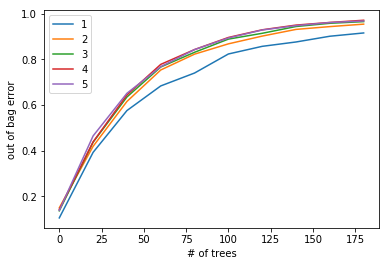

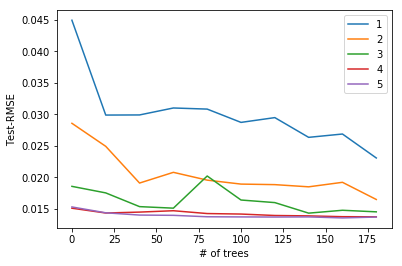

In [6]:
x = np.arange(0,200,20)
for k in features:
    plt.plot(x,oob_tree[k],label=k+1)
plt.xlabel('# of trees')
plt.ylabel('out of bag error')
plt.legend(loc='best')
plt.show()

for k in features:
    plt.plot(x,rmse_tree[k],label=k+1)
plt.xlabel('# of trees')
plt.ylabel('Test-RMSE')
plt.legend(loc='best')
plt.show()

In [7]:
#iii
max_depth = [4,6,8,12,14]
num_trees = np.arange(0,200,20)
oob_tree = np.zeros((5,10))
rmse_tree = np.zeros((5,10))
for i in range(len(max_depth)):
    for j in range(len(num_trees)):
        oob, rmse_train, rmse_test = random_forest(n_estimator=j+1,max_depth=max_depth[i])
        oob_tree[i][j] = oob
        rmse_tree[i][j] = rmse_test
    
# x = np.arange(0,200,20)
# for k in features:
#     plt.plot(x,oob[k])
# plt.xlabel('# of trees')
# plt.ylabel('out of bag error')
# plt.show()

# for k in max_depth:
#     plt.plot(x,rmse_tree[k])
# plt.xlabel('# of trees')
# plt.ylabel('Test-RMSE')
# plt.show()

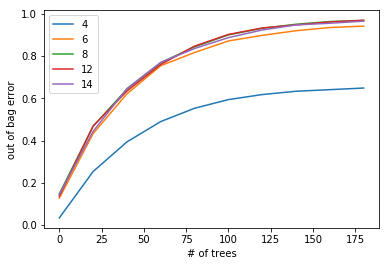

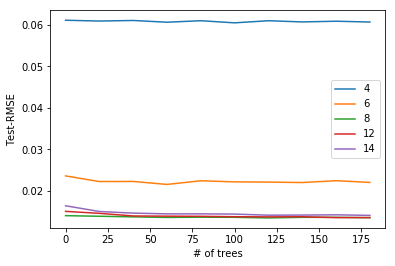

In [8]:
x = np.arange(0,200,20)
for k in range(len(max_depth)):
    plt.plot(x,oob_tree[k],label=max_depth[k])
plt.xlabel('# of trees')
plt.ylabel('out of bag error')
plt.legend(loc='best')
plt.show()

for k in range(len(max_depth)):
    plt.plot(x,rmse_tree[k],label=max_depth[k])
plt.xlabel('# of trees')
plt.ylabel('Test-RMSE')
plt.legend(loc='best')
plt.show()

From the graphs above, we can see that more features and trees have better solution.And max_depth = 8 has the best solution. So we choose features = 5, number of trees = 200, max_depth = 8 are the best parameters.

In [9]:
#iv
rf = RandomForestRegressor(n_estimators=200, max_depth=12, bootstrap=True, max_features=5, oob_score=True)
rf.fit(X,y)
rf.feature_importances_ 

array([ 0.00352337,  0.19761147,  0.39543944,  0.13035342,  0.27307231])

According to the result above, # of week:0.00114067,  'Day of Week':0.200691, 'Backup Start Time - Hour of Day':0.3947495, 'Work-Flow-ID':0.14497458 , 'File Name':0.25844425 

So the top3 important features are: Backup Start Time - Hour of Day, File Name, Day of Week

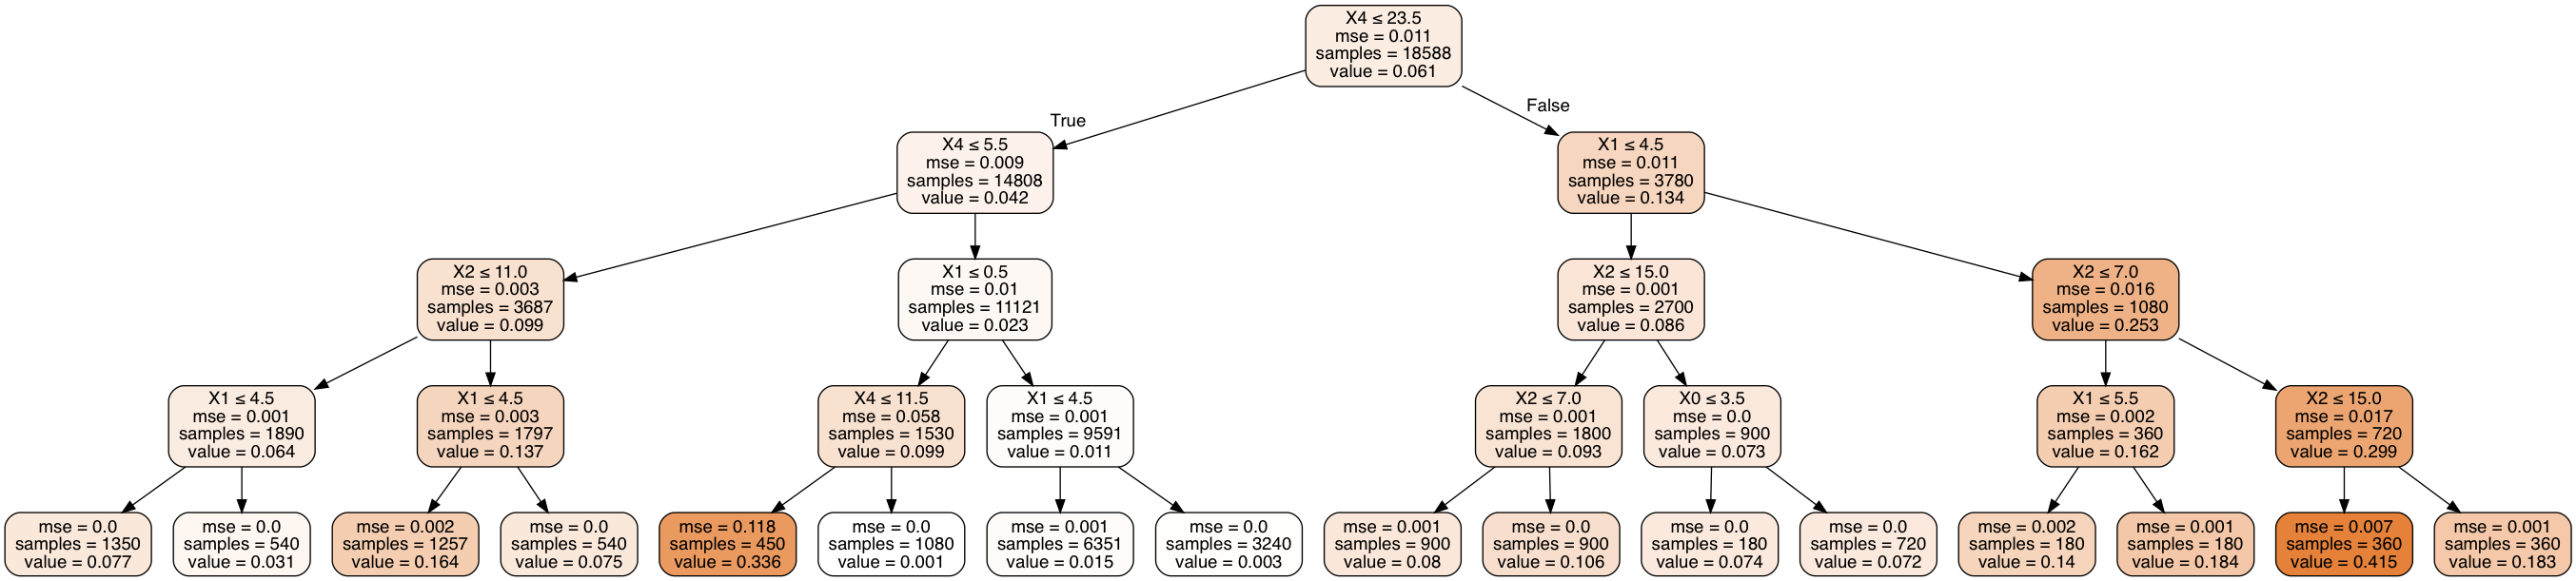

In [6]:
#v
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(max_depth=4,max_features=5)
dtree.fit(X,y)
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [7]:
rf = RandomForestRegressor(n_estimators=200, max_depth=4, bootstrap=True, max_features=5, oob_score=True)
rf.fit(X,y)
rf.feature_importances_ 

array([  6.40285059e-06,   2.72288817e-01,   1.49847701e-01,
         1.96205325e-01,   3.81651754e-01])

According to the graph above, the top3 important features for max_depth=4 is x4,x1,x2

The result got by attribute feature_importances_ is x4,x1,x3. They are almost the same.

